In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Display all the columns of the dataset
pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv('H:\Intern Project\customer personality analysis/Transformed_Data.csv')
data = pd.read_csv('H:\Intern Project\customer personality analysis/Cluster_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,Total_Spendings,Total_Children,Age_Group,NumAllPurchases,TotalAcceptedCmp
0,5524,1957,2,1,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,33.0,1617,0,1,22,1
1,2174,1954,2,1,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,5.0,27,2,2,4,0
2,4141,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,17.0,776,0,1,20,0
3,6182,1984,2,0,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,3.0,53,1,0,6,0
4,5324,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,12.0,422,1,0,14,0


In [4]:
data.head()

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Age,Total_Spendings,Total_Children,NumAllPurchases,TotalAcceptedCmp
0,2,1,58138.0,7,0,58,1617,0,22,1
1,2,1,46344.0,5,0,61,27,2,4,0
2,2,0,71613.0,4,0,50,776,0,20,0
3,2,0,26646.0,6,0,31,53,1,6,0
4,4,0,58293.0,5,0,34,422,1,14,0


# Model Building

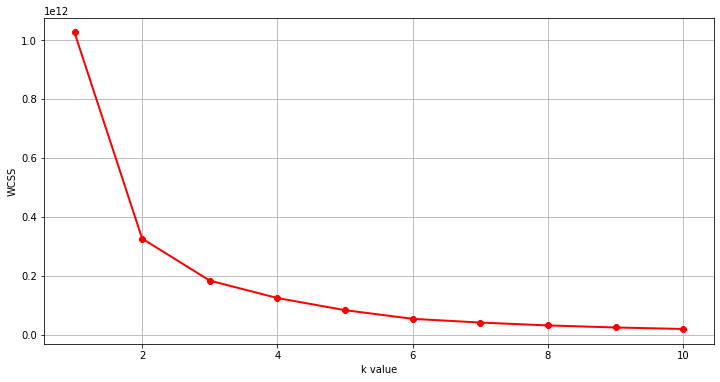

In [5]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.xlabel('k value')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(data)
label

array([1, 0, 1, ..., 1, 1, 0])

In [7]:
cluster_data = data.copy()
cluster_data['cluster'] = label

In [8]:
print(kmeans.cluster_centers_)

[[2.51233672e+00 3.68650218e-01 4.34810348e+04 6.30333817e+00
  1.16110305e-02 4.66487663e+01 2.55467344e+02 1.31785196e+00
  9.03918723e+00 2.68505080e-01]
 [2.53751914e+00 3.41500766e-01 6.34323859e+04 4.55895865e+00
  7.65696784e-03 4.90061256e+01 8.86344564e+02 8.97396631e-01
  1.74900459e+01 3.70597243e-01]
 [2.45431472e+00 3.60406091e-01 8.29887868e+04 2.68020305e+00
  5.07614213e-03 4.69771574e+01 1.42490102e+03 3.09644670e-01
  1.95786802e+01 1.22335025e+00]
 [2.00200000e+00 3.50000000e-01 2.41773640e+04 7.03400000e+00
  1.00000000e-02 4.08660000e+01 7.75500000e+01 1.02000000e+00
  5.38200000e+00 1.82000000e-01]]


In [9]:
df['Clusters'] = cluster_data.cluster

Text(0.5, 1.0, 'Clusters with Total_Spendings')

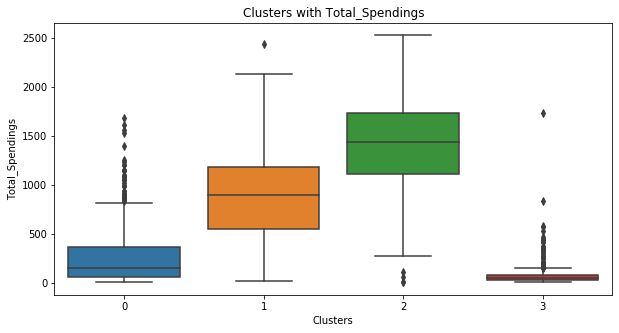

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='Total_Spendings', data=df)
plt.ylabel('Total_Spendings')
plt.xlabel('Clusters')
plt.title('Clusters with Total_Spendings')

Text(0.5, 1.0, 'Clusters with income')

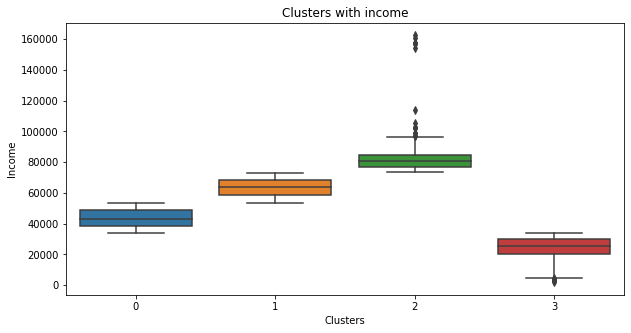

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='Income', data=df)
plt.ylabel('Income')
plt.xlabel('Clusters')
plt.title('Clusters with income')

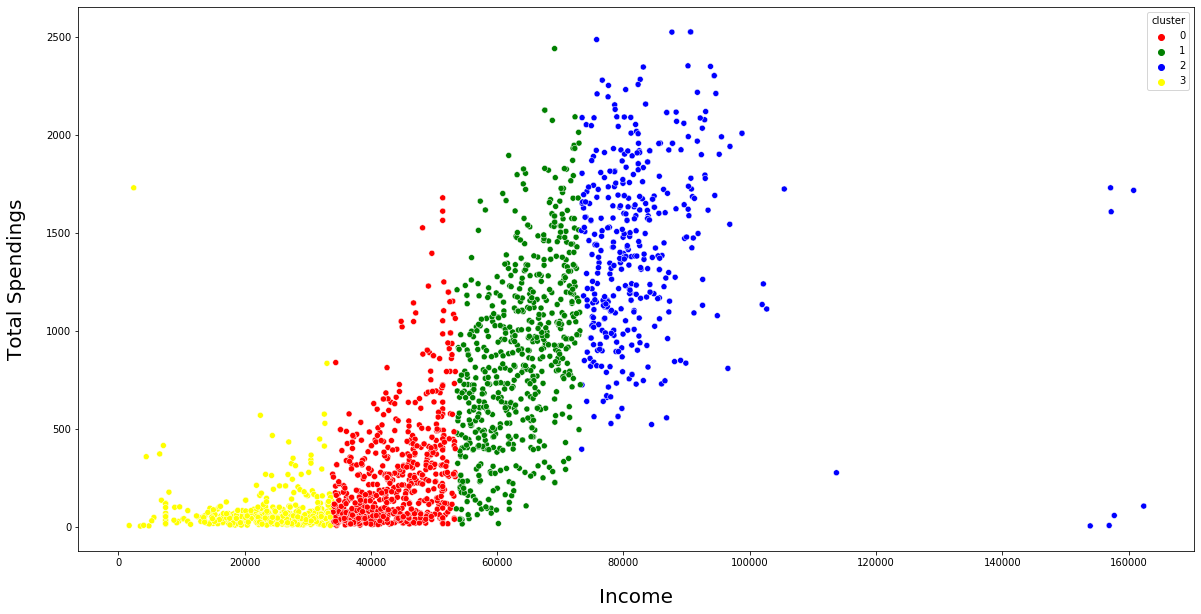

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cluster_data, x='Income', y='Total_Spendings', hue='cluster',palette=['red','green','blue','yellow']);
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

<Figure size 2160x2160 with 0 Axes>

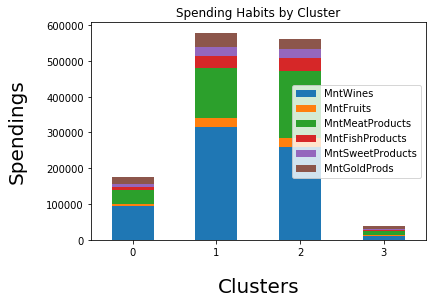

In [13]:
product_spendings = df.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,30))
product_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center')
plt.show()

Text(0.5, 1.0, 'Clusters with Age')

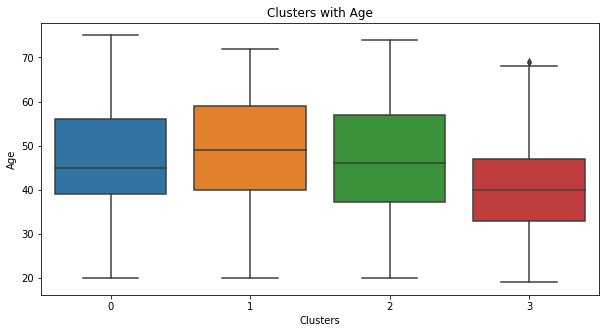

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='Age', data=df)
plt.ylabel('Age')
plt.xlabel('Clusters')
plt.title('Clusters with Age')

Text(0.5, 1.0, 'Clusters with NumAllPurchases')

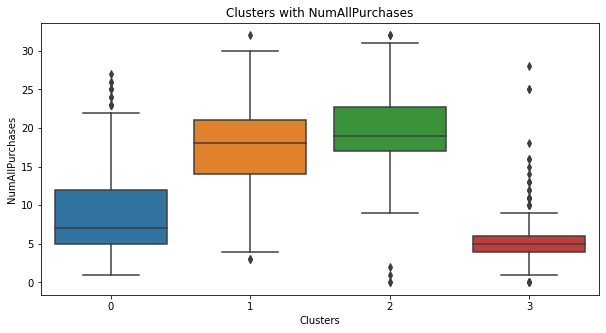

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='NumAllPurchases', data=df)
plt.ylabel('NumAllPurchases')
plt.xlabel('Clusters')
plt.title('Clusters with NumAllPurchases')